**Proyecto Final: Optimizacion de Regresion Lineal con
Descenso del Gradiente**                                                                     
**Jesus Antonio Torres Contreras**

In [29]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# Cargar los datos como DataFrame
iris = load_iris(as_frame=True)
df = iris.frame

# Renombrar columnas por claridad si lo deseas
df.columns = [col.lower().replace(" (cm)", "").replace(" ", "_") for col in df.columns]

# Extraer las variables necesarias
X = df[['sepal_width', 'petal_width', 'sepal_length']].values  # Variables independientes
y = df['petal_length'].values.reshape(-1, 1)  # Variable dependiente y le aplique un reshape para manejar mas facil los datos

In [30]:
np.random.seed(123)
m, n = X.shape
W = np.zeros((n, 1))
b = 0.0
alpha = 0.01
epocas = 1000

def predicciones(X, y, W, b):
    N = len(y)
    y_pred = X @ W + b
    cost = (1 / (2 * N)) * np.sum((y_pred - y) ** 2)
    return cost

def gradiente(X, y, W, b):
    N = len(y)
    y_pred = X @ W + b
    error = y_pred - y
    dW = (1 / N) * (X.T @ error)
    db = (1 / N) * np.sum(error)
    return dW, db

In [31]:
cost_history = []

for epoch in range(epocas):
    dW, db = gradiente(X, y, W, b)
    W -= alpha * dW
    b -= alpha * db
    cost = predicciones(X, y, W, b)
    cost_history.append(cost)

    if epoch % 100 == 0:
        print(f"Epoca {epoch}: Costo = {cost:.4f}")

Epoca 0: Costo = 3.1475
Epoca 100: Costo = 0.2828
Epoca 200: Costo = 0.1089
Epoca 300: Costo = 0.0651
Epoca 400: Costo = 0.0540
Epoca 500: Costo = 0.0511
Epoca 600: Costo = 0.0504
Epoca 700: Costo = 0.0501
Epoca 800: Costo = 0.0500
Epoca 900: Costo = 0.0499


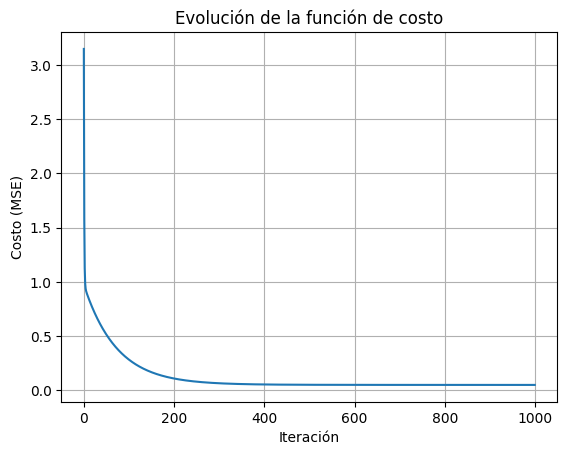

In [32]:
import matplotlib.pyplot as plt

plt.plot(cost_history)
plt.xlabel("Iteración")
plt.ylabel("Costo (MSE)")
plt.title("Evolución de la función de costo")
plt.grid(True)
plt.show()

In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

print("\nModelo propio:")
print("W:", W.ravel())
print("b:", b)

print("\nModelo con scikit-learn:")
print("W:", model.coef_.ravel())
print("b:", model.intercept_[0])


Modelo propio:
W: [-0.71339682  1.40626823  0.74551931]
b: -0.10219937214494418

Modelo con scikit-learn:
W: [-0.64601244  1.44679341  0.72913845]
b: -0.2627111975741898


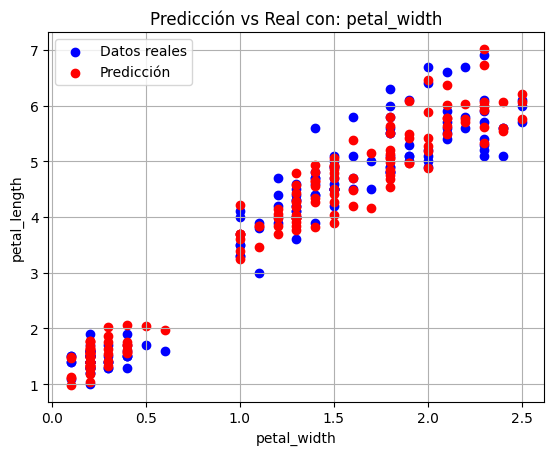

In [34]:
plt.scatter(X[:, 1], y, color='blue', label="Datos reales")
plt.scatter(X[:, 1], X @ W + b, color='red', label="Predicción")
plt.xlabel("petal_width")
plt.ylabel("petal_length")
plt.title("Predicción vs Real con: petal_width")
plt.legend()
plt.grid(True)
plt.show()